In [308]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

file_path = '/Users/A.Itsenkov/Documents/Учеба/диплом/input_data.csv'
data = pd.read_csv(file_path)


In [309]:
# Показать первые несколько строк данных для проверки
data = pd.read_csv(file_path, sep=';')

In [310]:
data.head(5)

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.30,0.00,56.78,60.70,0,2,620000.00,NaN,66,1632918.00
1,2021-01-01,1450000,5,5,1,33.00,6.00,44.61,40.14,0,0,385000.00,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.00,12.00,55.54,37.73,3,0,142701.00,242543.00,50,681306.00
3,2021-01-01,3100000,3,5,3,82.00,9.00,44.61,40.14,0,0,385000.00,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.00,9.00,44.74,37.71,3,2,353960.00,439378.00,23,1730985.00


In [311]:
# date - date of publication of the announcement
# price - Price. in rubles
# level - Apartment floor
# levels - Number of storeys
# rooms - the number of living rooms. If the value is "-1", then it means "studio apartment"
# area - the total area of the apartment
# kitchen_area - Kitchen area
# geo_lat - Latitude
# geo_lon - Longitude
# building_type - Facade type: 
# 0 - Don't know. 1 - Other. 2 - Panel. 3 - Monolithic. 4 - Brick. 5 - Blocky. 6 - Wooden

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358150 entries, 0 to 11358149
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          int64  
 2   level          int64  
 3   levels         int64  
 4   rooms          int64  
 5   area           float64
 6   kitchen_area   float64
 7   geo_lat        float64
 8   geo_lon        float64
 9   building_type  int64  
 10  object_type    int64  
 11  postal_code    float64
 12  street_id      float64
 13  id_region      int64  
 14  house_id       float64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.3+ GB


In [313]:
# преобразовываем price в float64
data['price'] = data['price'].astype(float)

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358150 entries, 0 to 11358149
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          float64
 2   level          int64  
 3   levels         int64  
 4   rooms          int64  
 5   area           float64
 6   kitchen_area   float64
 7   geo_lat        float64
 8   geo_lon        float64
 9   building_type  int64  
 10  object_type    int64  
 11  postal_code    float64
 12  street_id      float64
 13  id_region      int64  
 14  house_id       float64
dtypes: float64(8), int64(6), object(1)
memory usage: 1.3+ GB


In [315]:
data.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,10850379.00,7152596.00,11358150.00,8096207.00
mean,6787516.41,6.43,11.76,1.72,53.10,-2.67,54.40,52.30,1.02,0.53,403171.66,352562.33,51.26,1703792.31
std,197711828.43,5.28,7.22,1.16,27.13,32.42,4.58,21.84,1.56,0.88,195961.84,136648.51,22.51,640457.78
min,0.00,0.00,0.00,-1.00,1.00,-100.00,41.44,-173.22,0.00,0.00,0.00,116187.00,1.00,588606.00
25%,2600000.00,2.00,5.00,1.00,36.50,0.00,53.19,37.64,0.00,0.00,196158.00,233915.00,31.00,1162465.00
50%,3995000.00,5.00,10.00,2.00,46.70,6.50,55.65,42.02,0.00,0.00,400007.00,350222.00,54.00,1703143.00
75%,6500000.00,9.00,17.00,2.00,63.00,10.50,56.87,65.47,2.00,2.00,625007.00,470537.00,72.00,2255297.00
max,635552400000.00,50.00,50.00,9.00,499.90,408.00,73.51,179.26,6.00,2.00,862163.00,588597.00,200.00,2839173.00


In [316]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [317]:
# data.describe()

In [318]:
# # первое на что обращается внимание это минуса, которые стоят в столбиках rooms, kitchen_area, geo_lon. 
# Будем считать что операционист некоррректно вбил данные и зачем то написал минус перед цифрой. 
# Поменяем минусовые значения на положительные
data['rooms'] = data['rooms'].abs()
data['kitchen_area'] = data['kitchen_area'].abs()
data['geo_lon'] = data['geo_lon'].abs()

In [319]:
data.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,10850379.00,7152596.00,11358150.00,8096207.00
mean,6787516.41,6.43,11.76,1.87,53.10,16.56,54.40,52.30,1.02,0.53,403171.66,352562.33,51.26,1703792.31
std,197711828.43,5.28,7.22,0.90,27.13,28.00,4.58,21.84,1.56,0.88,195961.84,136648.51,22.51,640457.78
min,0.00,0.00,0.00,1.00,1.00,0.00,41.44,19.88,0.00,0.00,0.00,116187.00,1.00,588606.00
25%,2600000.00,2.00,5.00,1.00,36.50,0.00,53.19,37.64,0.00,0.00,196158.00,233915.00,31.00,1162465.00
50%,3995000.00,5.00,10.00,2.00,46.70,8.20,55.65,42.02,0.00,0.00,400007.00,350222.00,54.00,1703143.00
75%,6500000.00,9.00,17.00,2.00,63.00,13.00,56.87,65.47,2.00,2.00,625007.00,470537.00,72.00,2255297.00
max,635552400000.00,50.00,50.00,9.00,499.90,408.00,73.51,179.26,6.00,2.00,862163.00,588597.00,200.00,2839173.00


In [320]:
# теперь поищем все не заполненные значения
data.isnull().sum()

date                   0
price                  0
level                  0
levels                 0
rooms                  0
area                   0
kitchen_area           0
geo_lat                0
geo_lon                0
building_type          0
object_type            0
postal_code       507771
street_id        4205554
id_region              0
house_id         3261943
dtype: int64

In [321]:
# с учетом наличия координат geo_lat и geo_lon у нас нет необходимости в колонках postal_code, street_id и house_id. 
# Можно удалить в целом эти колонки, так как они не несут для нас информационной ценности.
data = data.drop('street_id', axis=1)
data = data.drop('postal_code', axis=1)
data = data.drop('house_id', axis=1)
data.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23


In [322]:
data.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region
count,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00
mean,6787516.41,6.43,11.76,1.87,53.10,16.56,54.40,52.30,1.02,0.53,51.26
std,197711828.43,5.28,7.22,0.90,27.13,28.00,4.58,21.84,1.56,0.88,22.51
min,0.00,0.00,0.00,1.00,1.00,0.00,41.44,19.88,0.00,0.00,1.00
25%,2600000.00,2.00,5.00,1.00,36.50,0.00,53.19,37.64,0.00,0.00,31.00
50%,3995000.00,5.00,10.00,2.00,46.70,8.20,55.65,42.02,0.00,0.00,54.00
75%,6500000.00,9.00,17.00,2.00,63.00,13.00,56.87,65.47,2.00,2.00,72.00
max,635552400000.00,50.00,50.00,9.00,499.90,408.00,73.51,179.26,6.00,2.00,200.00


In [323]:
# далее удалим все строки где значения по колонке price равняются нулю

In [324]:
data = data[data['price'] != 0]

In [325]:
data.shape

(11350050, 12)

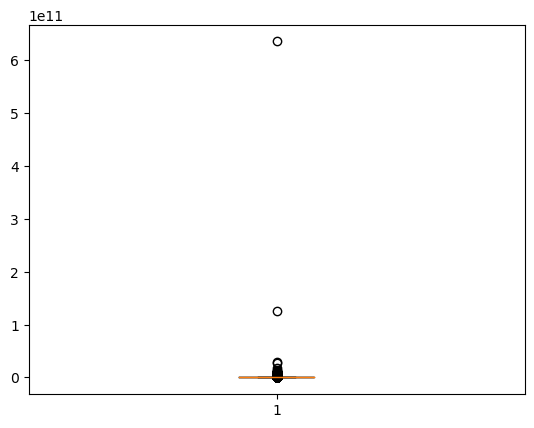

In [326]:
# сильно бросается в глаза максимальное значение по колонке price, 
# посмотрим выбросы по этой колонке и удалим лишнее

plt.boxplot(data['price'])
# plt.title('Boxplot для колонки price')
plt.show()

In [327]:
# видим большие выбросы. Удалим 1% самых верхних и самых нижних выбросов
price_low = data['price'].quantile(0.01)
price_high  = data['price'].quantile(0.99)

data_final_price = data[(data['price'] < price_high) & (data['price'] > price_low)]

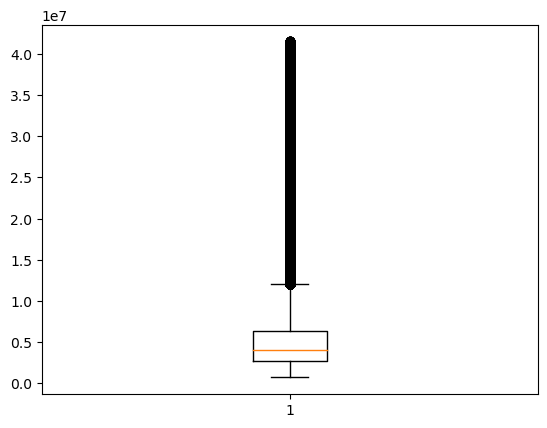

In [328]:
plt.boxplot(data_final_price['price'])
# plt.title('Boxplot для колонки price')
plt.show()

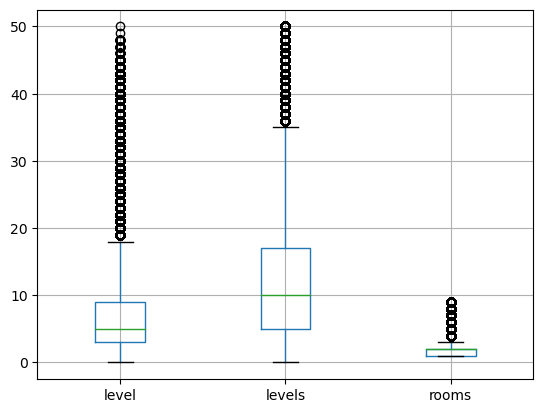

In [329]:
# посмотрим также боксплоты по остальным колонкам
data_final_price[["level", "levels", "rooms"]].boxplot()
plt.show()


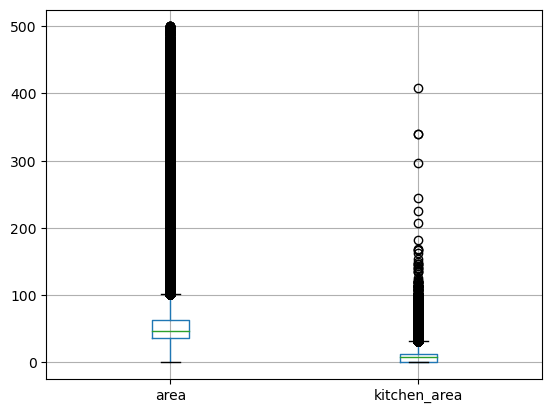

In [330]:
data_final_price[["area", "kitchen_area"]].boxplot()
plt.show()

In [331]:
# есть немного выбросов по колонке kitchen_area, но это можно списать на устройство квартиры.
# Проверим условие, что площадь кухни не может быть больше чем общая площадь квартиры.
count_area_less_kitchen = (data_final_price['kitchen_area'] > data_final_price['area']).sum()
count_area_less_kitchen

1003039

In [332]:
# у нас есть очень много квартир, в которых площадь кухни больше, чем общая площадь аппартаментов. 
# Можно либо удалить все эти строки, либо поменять местами значения в этих двух колонках, 
# списав некорректные данные на заслуги операциониста.
# Так как объем очень велик, то лучше заменить местами
new_data = data_final_price.copy()

In [333]:
condition = new_data['kitchen_area'] > new_data['area']
new_data.loc[condition, ['kitchen_area', 'area']] = new_data.loc[condition, ['area', 'kitchen_area']].values
new_data.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23


In [334]:
new_data.shape

(11117255, 12)

In [335]:
# Обратим внимание что у нас есть максимальный регион 200. В России на данный момент всего 85 регионов. 
new_data.id_region.unique()

array([ 66,   1,  50,  23,  34,  54,   3,  58,  77,  72,  78,  76,   2,
        40,  73,  18,  48,  27,  41,  63,  38,  15,  10,  39,  86,  16,
        47,   7,  26,   5,  91,  52,  56,  36,   9,  33,  31,  24,  74,
        22,  17,  43,  32,  64,  59,  46,  44,  61,  42,  12,  71,  57,
        29,  37,  21,  92,  51,  19,  70,  30,  75,  13,  69,  62,   8,
        35,  28,  68,  14,  20,  45,  55,  67,  25,  89,  11,  53,  60,
         6,  65,  49,   4, 200,  87,  83,  79])

In [336]:
region_200_data = new_data[new_data['id_region'] == 200]
region_200_data.shape
# в данном случае можно через широту и долготу найти конкретный регион, 
# но так как у нас количество квартир в этом регионе очень мало, то просто удалим их с датасета для экономии времени

(3543, 12)

In [337]:
new_data = new_data[new_data['id_region'] != 200]
new_data.shape

(11113712, 12)

In [338]:
# Далее поищем дубликаты и удалим их, если они есть
new_data.duplicated().sum()

401428

In [339]:
final_data = new_data.drop_duplicates()

In [340]:
final_data.shape

(10712284, 12)

In [342]:
regions = {
    1: 'Республика Адыгея',
    2: 'Республика Башкортостан', 
    3: 'Республика Бурятия',
    4: 'Республика Алтай',
    5: 'Республика Дагестан',
    6: 'Республика Ингушетия',
    7: 'Кабардино-Балкарская Республика',
    8: 'Республика Калмыкия',
    9: 'Карачаево-Черкесская Республика',
    10: 'Республика Карелия',
    11: 'Республика Коми',
    12: 'Республика Марий Эл', 
    13: 'Республика Мордовия', 
    14: 'Республика Саха', 
    15: 'Республика Северная Осетия-Алания', 
    16: 'Республика Татарстан', 
    17: 'Республика Тыва',
    18: 'Удмуртская Республика',
    19: 'Республика Хакасия',
    20: 'Чеченская Республика',
    21: 'Чувашская Республика',
    22: 'Алтайский край',
    23: 'Краснодарский край',
    24: 'Красноярский край',
    25: 'Приморский край',
    26: 'Ставропольский край',
    27: 'Хабаровский край',
    28: 'Амурская область',
    29: 'Архангельская область',
    30: 'Астраханская область',
    31: 'Белгородская область',
    32: 'Брянская область',
    33: 'Владимирская область',
    34: 'Волгоградская область',
    35: 'Вологодская область',
    36: 'Воронежская область',
    37: 'Ивановская область',
    38: 'Иркутская область',
    39: 'Калининградская область',
    40: 'Калужская область',
    41: 'Камчатский край',
    42: 'Кемеровская область',
    43: 'Кировская область',
    44: 'Костромская область',
    45: 'Курганская область',
    46: 'Курская область',
    47: 'Ленинградская область',
    48: 'Липецкая область',
    49: 'Магаданская область',
    50: 'Московская область',
    51: 'Мурманская область',
    52: 'Нижегородская область',
    53: 'Новгородская область',
    54: 'Новосибирская область',
    55: 'Омская область',
    56: 'Оренбургская область',
    57: 'Орловская область',
    58: 'Пензенская область',
    59: 'Пермский край',
    60: 'Псковская область',
    61: 'Ростовская область',
    62: 'Рязанская область',
    63: 'Самарская область',
    64: 'Саратовская область',
    65: 'Сахалинская область',
    66: 'Свердловская область',
    67: 'Смоленская область',
    68: 'Тамбовская область',
    69: 'Тверская область',
    70: 'Томская область',
    71: 'Тульская область',
    72: 'Тюменская область',
    73: 'Ульяновская область',
    74: 'Челябинская область',
    75: 'Забайкальский край',
    76: 'Ярославская область',
    77: 'Город Москва',
    78: 'Город Санкт-Петербург',
    79: 'Еврейская автономная область',
    83: 'Ненецкий автономный округ',
    86: 'Ханты-Мансийский автономный округ',
    87: 'Чукотский автономный округ',
    89: 'Ямало-Ненецкий автономный округ',
    91: 'Республика Крым',
    92: 'Город Севастополь'
}

In [343]:
# final_data['region_name'] = final_data['id_region'].map(regions)

In [344]:
final_df = final_data.copy()

In [345]:
final_df['region_name'] = final_df['id_region'].map(regions)

In [346]:
final_df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region,region_name
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66,Свердловская область
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1,Республика Адыгея
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50,Московская область
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1,Республика Адыгея
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23,Краснодарский край


In [347]:
# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ

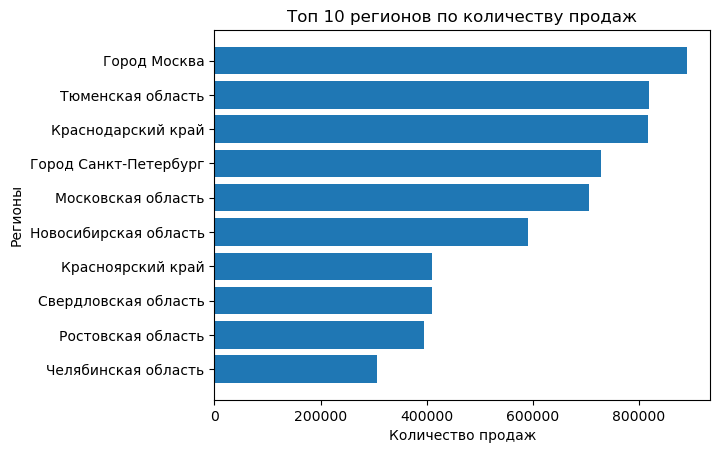

In [348]:
sales_in_region = final_df['region_name'].value_counts().sort_values(ascending=True).tail(10)
plt.barh(sales_in_region.index, sales_in_region.values)
plt.xlabel('Количество продаж')
plt.ylabel('Регионы')
plt.title('Топ 10 регионов по количеству продаж')
plt.show()

In [349]:
# Выявим для каждого региона минимальные цены объктов    

In [350]:
final_df.groupby('region_name', as_index=False).agg(min_price = ("price", "min"))

,region_name,min_price
0,Алтайский край,705000.00
1,Амурская область,720000.00
2,Архангельская область,710000.00
3,Астраханская область,710000.00
4,Белгородская область,710000.00
...,...,...
80,Чеченская Республика,750000.00
81,Чувашская Республика,705000.00
82,Чукотский автономный округ,800000.00
83,Ямало-Ненецкий автономный округ,750000.00


In [351]:
# Лидеры по самой минимальной цене квартиры

In [352]:
top_10_min = final_df.sort_values(by = 'price', ascending=True) 
top_10_min[['region_name', 'price']].head(10)

,region_name,price
10565130,Республика Башкортостан,700001.00
11284299,Кабардино-Балкарская Республика,700002.00
2877173,Кабардино-Балкарская Республика,700003.00
9440529,Кабардино-Балкарская Республика,700004.00
9202353,Республика Татарстан,700020.00
4249684,Новосибирская область,700050.00
7695331,Краснодарский край,700100.00
9089320,Рязанская область,700200.00
7527083,Свердловская область,700202.00
7500668,Свердловская область,700202.00


In [353]:
# Выявим для каждого региона максимальные цены объктов   

In [354]:
final_df.groupby('region_name', as_index=True).agg(max_price = ("price", "max"))

,max_price
region_name,
Алтайский край,37500000.00
Амурская область,39994600.00
Архангельская область,32500000.00
Астраханская область,34000000.00
Белгородская область,40000000.00
...,...
Чеченская Республика,32000000.00
Чувашская Республика,37500000.00
Чукотский автономный округ,13000000.00


In [355]:
# Лидеры по самой максимальной цене квартиры

In [356]:
top_10_max = final_df.sort_values(by = 'price', ascending=False) 
top_10_max[['region_name', 'price']].head(10)

,region_name,price
9005902,Город Москва,41499999.00
8177521,Город Москва,41499015.00
8176813,Город Москва,41499015.00
7300178,Московская область,41499000.00
11200081,Московская область,41499000.00
1848734,Город Санкт-Петербург,41499000.00
2644433,Город Санкт-Петербург,41499000.00
215511,Город Москва,41497600.00
5343492,Город Санкт-Петербург,41496692.00
9981118,Город Санкт-Петербург,41496692.00


In [357]:
# Выявим для каждого региона средние цены объектов      

In [358]:
list_of_avg = final_df.groupby('region_name', as_index=False).agg(avg_price = ("price", "mean"))
list_of_avg.head()

,region_name,avg_price
0,Алтайский край,2967489.33
1,Амурская область,5037904.37
2,Архангельская область,3712472.15
3,Астраханская область,2934585.23
4,Белгородская область,3833270.55


In [359]:
top_5_max_avg = list_of_avg.nlargest(5, 'avg_price')
top_5_min_avg = list_of_avg.nsmallest(5, 'avg_price')

print("Топ 5 максимальных значений:")
print(top_5_max_avg)

print("\nТоп 5 минимальных значений:")
print(top_5_min_avg)

Топ 5 максимальных значений:
              region_name   avg_price
10           Город Москва 14395566.35
11  Город Санкт-Петербург  9229748.33
66    Сахалинская область  7600400.20
12      Город Севастополь  7229060.34
32     Московская область  6903944.84

Топ 5 минимальных значений:
                     region_name  avg_price
27            Курганская область 2071692.42
13  Еврейская автономная область 2395277.78
39          Оренбургская область 2435779.91
56           Республика Мордовия 2510765.89
55           Республика Марий Эл 2521892.84


In [360]:
# Далее будем заниматься корреляцией и строить матрицу корреляций. 
# Удалим все лишние столбцы, которые по нашему мнению не влияют на цену объекта - id_region, region_name и date

In [361]:
cor_df = final_df.drop(columns=['date', 'id_region', 'region_name'])

In [362]:
cor_df.head()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type
0,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2
1,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0
2,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0
3,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0
4,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2


In [363]:
# построим матрицу корреляций по всем регионам

In [364]:
cor_matrix = cor_df.corr()
cor_matrix

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type
price,1.00,0.23,0.32,0.30,0.39,0.16,0.06,-0.23,-0.09,0.15
level,0.23,1.00,0.67,-0.08,0.02,0.02,0.02,-0.09,-0.09,0.31
levels,0.32,0.67,1.00,-0.12,0.02,0.03,0.05,-0.13,-0.14,0.47
rooms,0.30,-0.08,-0.12,1.00,0.60,0.15,0.01,0.06,0.04,-0.09
area,0.39,0.02,0.02,0.60,1.00,0.56,-0.05,-0.01,0.08,-0.01
kitchen_area,0.16,0.02,0.03,0.15,0.56,1.00,-0.07,-0.07,0.10,0.01
geo_lat,0.06,0.02,0.05,0.01,-0.05,-0.07,1.00,0.08,0.04,0.08
geo_lon,-0.23,-0.09,-0.13,0.06,-0.01,-0.07,0.08,1.00,0.08,-0.13
building_type,-0.09,-0.09,-0.14,0.04,0.08,0.10,0.04,0.08,1.00,-0.13
object_type,0.15,0.31,0.47,-0.09,-0.01,0.01,0.08,-0.13,-0.13,1.00


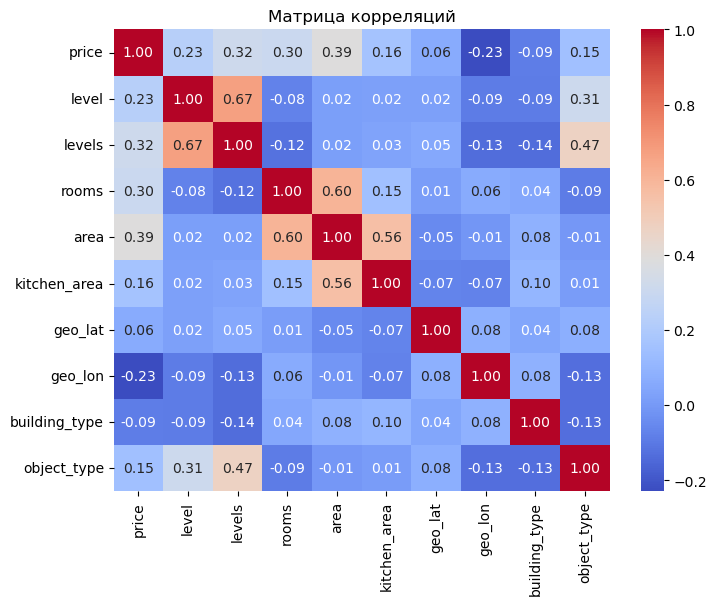

In [365]:
# рисуем тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [366]:
# выберем отдельный регион для исследования (Санкт-Петербург) и построим матрицу корреляций по всем регионам

In [367]:
df_spb = final_df[final_df.region_name == 'Город Санкт-Петербург'].copy()
df_spb = df_spb.drop(columns=['date', 'id_region', 'region_name'])
df_spb.head(10)

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type
15,8865000.00,10,13,2,66.70,14.60,59.85,30.41,4,2
63,4200000.00,12,25,1,100.00,25.80,60.04,30.23,3,2
99,6574995.00,10,11,1,100.00,31.00,59.94,30.25,3,0
108,7068330.00,12,13,1,42.30,18.70,55.64,37.65,0,2
151,8865000.00,11,13,2,66.70,14.60,59.85,30.41,4,2
183,7900000.00,4,9,3,100.00,74.00,59.89,30.46,2,0
219,2686370.00,2,15,1,100.00,26.50,59.89,30.45,3,2
221,3965000.00,20,23,1,30.50,13.00,60.03,30.46,0,2
231,7408788.00,17,17,1,37.11,12.92,59.97,30.40,1,2
239,6750183.00,8,10,1,100.00,30.40,59.88,30.44,4,2


In [368]:
spb_cor_matrix = df_spb.corr()
spb_cor_matrix

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type
price,1.00,-0.08,-0.18,0.62,0.62,0.30,-0.00,0.01,-0.03,-0.02
level,-0.08,1.00,0.62,-0.14,-0.09,-0.01,0.03,-0.01,-0.02,0.11
levels,-0.18,0.62,1.00,-0.23,-0.15,0.00,0.05,-0.02,-0.01,0.19
rooms,0.62,-0.14,-0.23,1.00,0.63,0.16,0.00,0.01,0.01,-0.15
area,0.62,-0.09,-0.15,0.63,1.00,0.58,0.01,-0.00,0.19,0.01
kitchen_area,0.30,-0.01,0.00,0.16,0.58,1.00,-0.01,-0.00,0.27,0.16
geo_lat,-0.00,0.03,0.05,0.00,0.01,-0.01,1.00,-0.64,0.01,-0.06
geo_lon,0.01,-0.01,-0.02,0.01,-0.00,-0.00,-0.64,1.00,-0.02,0.05
building_type,-0.03,-0.02,-0.01,0.01,0.19,0.27,0.01,-0.02,1.00,0.04
object_type,-0.02,0.11,0.19,-0.15,0.01,0.16,-0.06,0.05,0.04,1.00


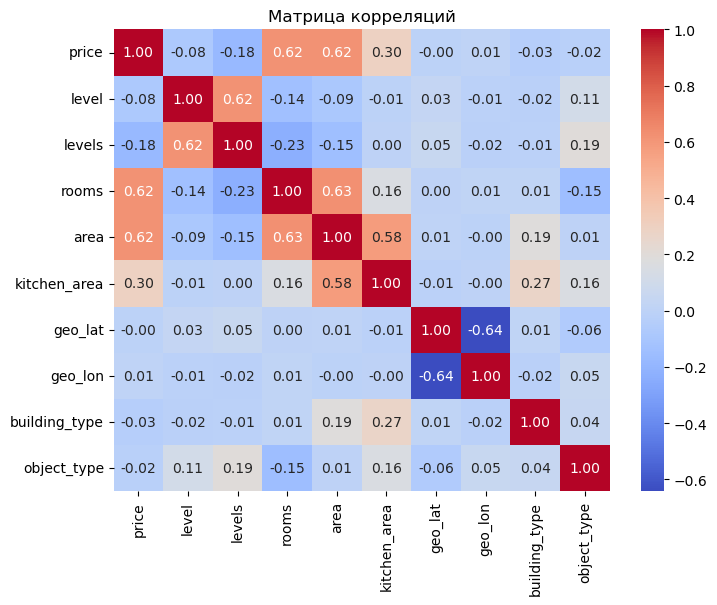

In [369]:
# рисуем тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(spb_cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [370]:
# выводы, что если смотреть взаимосвязь в целом по россии, то матрица корреляций малоинформативна. 
# это говорит о том, что все нашши переменные имеют некоторую степень взаимосвязи с ценой, 
# но она не является очень сильной. 

# а если рассматривать по Санкт-Петербургу отдельно, 
# то уже есть более четкая связь площади квартиры и соответственно наличие комнат с ценой. 

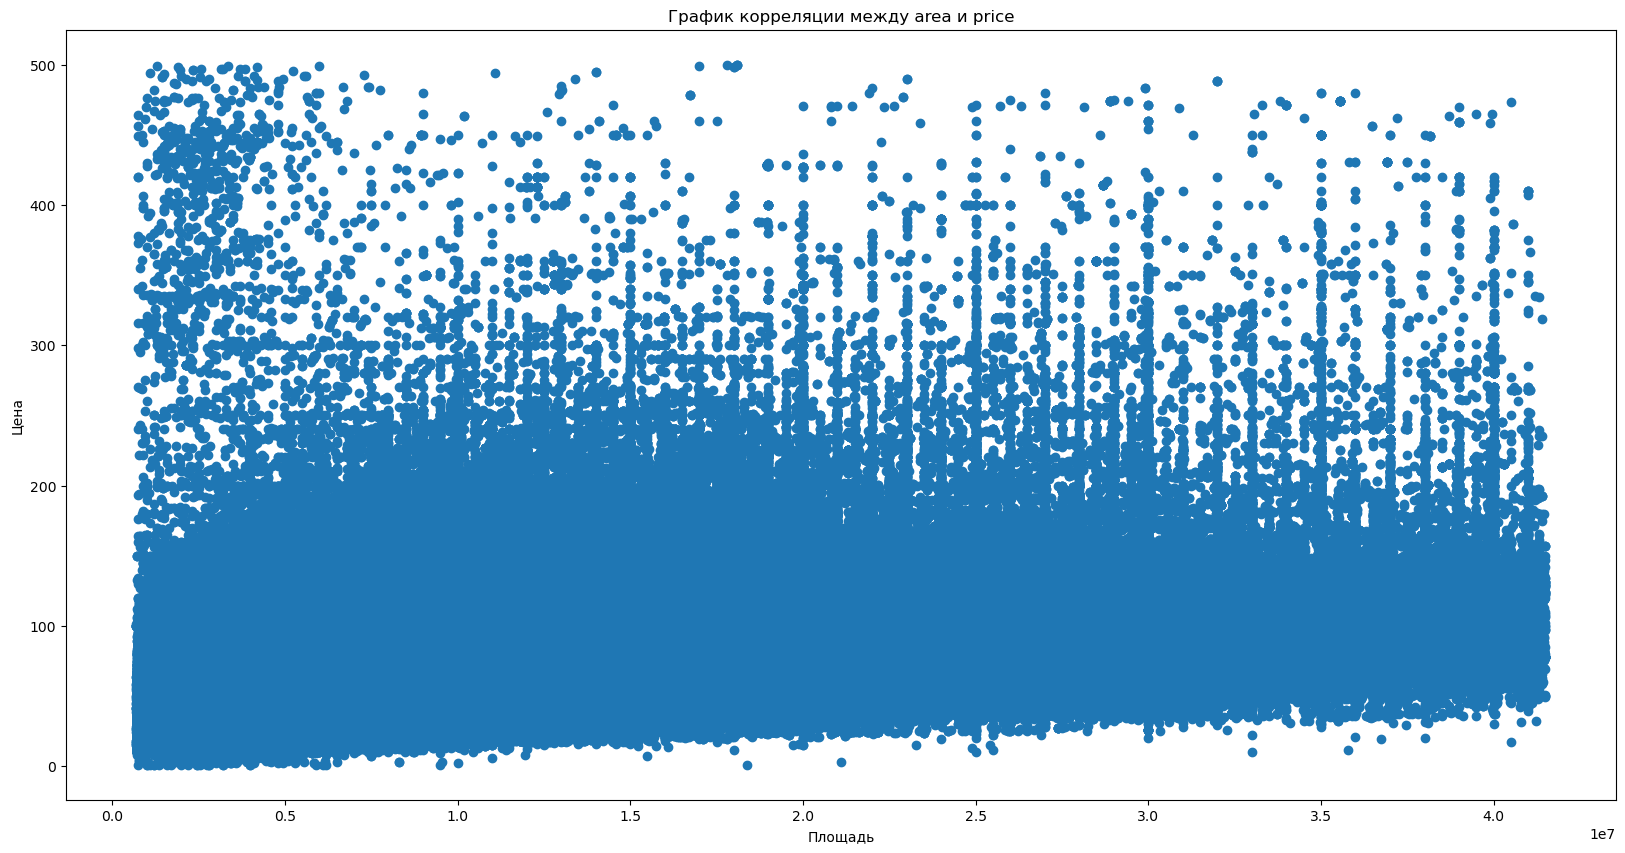

In [371]:
# так как у нас цель проекта — выявить, какие признаки больше всего влияют на стоимость квартиры, 
# то более внимательно связь между площадью квартир и ценой в целом по России и в Спб в частности.

plt.figure(figsize=(20, 10))
plt.scatter(final_df['price'], final_df['area'])
plt.title('График корреляции между area и price')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

# Можно сделать два вывода: что наш коэф корреляции указывает на наличие умеренной 
#     положительной линейной корреляции между переменными (цена и площадь).
#     и второй вывод: что продавцы любят округлять цифры при продаже объектов (нужен ли этот вывод?).

In [372]:
# sns.pairplot(df_spb)
# plt.title('Pairplot для числовых переменных')
# plt.show()

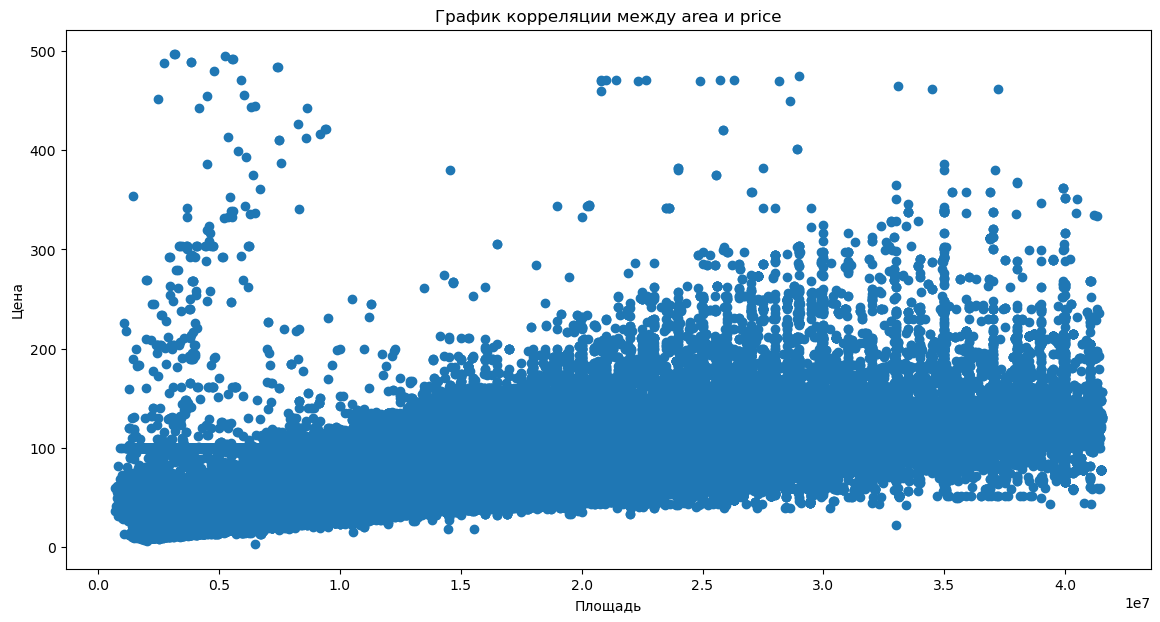

In [373]:
# так как у нас цель проекта — выявить, какие признаки больше всего влияют на стоимость квартиры, 
# то более внимательно связь между площадью квартир и ценой в целом по России и в Спб в частности.

plt.figure(figsize=(14, 7))
plt.scatter(df_spb['price'], df_spb['area'])
plt.title('График корреляции между area и price')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

# на примере Санкт-Петербурга коэф корреляции между площадью и ценой 
# становится более существенным, корреляция усиливается

In [374]:
# Рассчитать коэффициенты корреляции Спирмена по регионам в целом
final_df[['price', 'area']].corr(method='spearman')
# положительная корреляция, связь умеренная.

,price,area
price,1.00,0.39
area,0.39,1.00


In [375]:
# Рассчитать коэффициенты корреляции Спирмена по Спб
df_spb[['price', 'area']].corr(method='spearman')
# положительная корреляция, связь средняя

,price,area
price,1.00,0.60
area,0.60,1.00


In [376]:
# построим линейную регрессию по Спб в отдельности

In [377]:
X = df_spb[['area']]
y = df_spb['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [378]:
# Создаём и обучаем модель

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [379]:
lr.coef_
# на каждое изменение квадратного метра площади - цена меняется на 125 тыс

array([124745.15207862])

In [380]:
lr.intercept_
# по сути это минимальное значение квартиры, сколько будет стоить квартира, при нулевом кол-ве площоди

1963162.8238543207

In [381]:
lr.score(X_test, y_test)
# коэф детерминации не высокий, следовательно, лишь 38% цен на квартиры можно объяснить влиянием площади

0.378892160128003

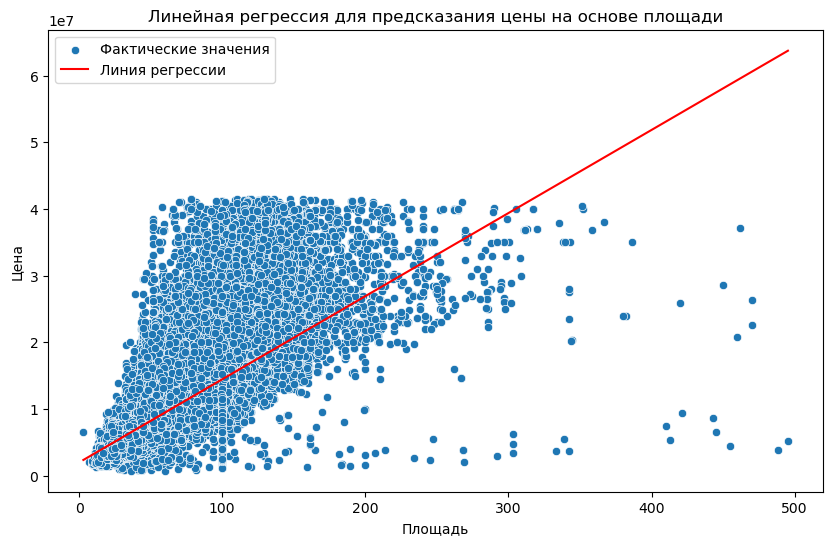

In [382]:
# Визуализация данных и линии регрессии
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['area'], y=y_test, label='Фактические значения')
sns.lineplot(x=X_test['area'], y=y_pred, color='red', label='Линия регрессии')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Линейная регрессия для предсказания цены на основе площади')
plt.legend()
plt.show()


In [383]:
# оцениваем качество
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


In [384]:
print('Mean Squared Error:', mse)
# Наша модель даёт низкое качество предсказываний 


Mean Squared Error: 23755211628306.45


In [385]:
# На основе этих результатов можно сделать вывод, что существует связь между площадью и ценой, 
# но она не является сильной. 
# Другие факторы также могут влиять на уровень цены в Спб.

In [386]:
# посмотрим какие квартиры наиболее часто продаются в регионах в спб в частности. 
# И исследуем статистические показатели.
# Рассмотрим модальные значения по России - какие квартиры чаще всего продаются.


final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index()

    
 

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_1342/72858588.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index()


,region_name,price,level,levels,rooms,area
0,Алтайский край,2500000.00,1,5,2,100.00
1,Амурская область,4500000.00,1,5,1,100.00
2,Архангельская область,3500000.00,2,5,2,100.00
3,Астраханская область,2500000.00,1,5,2,100.00
4,Белгородская область,3500000.00,1,9,1,100.00
...,...,...,...,...,...,...
80,Чеченская Республика,3500000.00,1,5,2,100.00
81,Чувашская Республика,2500000.00,1,9,1,100.00
82,Чукотский автономный округ,8500000.00,3,5,2,100.00
83,Ямало-Ненецкий автономный округ,5500000.00,1,9,1,100.00


In [387]:
# посмотрим теперь медианные значения
final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_1342/4155724028.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()


,region_name,price,level,levels,rooms,area
0,Алтайский край,2680000.00,4.00,9.00,2.00,51.10
1,Амурская область,4600000.00,3.00,5.00,2.00,55.00
2,Архангельская область,3490000.00,4.00,8.00,2.00,48.00
3,Астраханская область,2600000.00,4.00,5.00,2.00,57.00
4,Белгородская область,3600000.00,4.00,9.00,2.00,53.00
...,...,...,...,...,...,...
80,Чеченская Республика,3150000.00,4.00,5.00,2.00,100.00
81,Чувашская Республика,2500000.00,4.00,9.00,2.00,50.00
82,Чукотский автономный округ,4900000.00,3.00,5.00,2.00,59.50
83,Ямало-Ненецкий автономный округ,5700000.00,4.00,8.00,2.00,54.00


In [388]:
# посмотрим теперь средние значения
pd.options.display.float_format = '{:.2f}'.format
final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_1342/1572108108.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()


,region_name,price,level,levels,rooms,area
0,Алтайский край,2967489.33,5.52,10.10,1.98,58.17
1,Амурская область,5037904.37,4.12,7.28,1.90,62.40
2,Архангельская область,3712472.15,4.19,7.32,2.03,54.27
3,Астраханская область,2934585.23,4.41,7.39,2.09,62.59
4,Белгородская область,3833270.55,4.67,8.15,2.07,58.53
...,...,...,...,...,...,...
80,Чеченская Республика,3724714.07,4.45,7.17,2.38,81.15
81,Чувашская Республика,2873109.88,5.28,9.39,1.81,56.82
82,Чукотский автономный округ,5075018.76,3.13,4.79,2.14,67.34
83,Ямало-Ненецкий автономный округ,5941943.17,4.05,6.92,1.98,55.31


In [389]:
# pd.options.display.float_format = None

In [390]:
# и отдельно по Спб
filtered_spb_df = final_df.query("region_name == 'Город Санкт-Петербург'")
filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index()

# Эти значения предоставляют информацию о наиболее часто встречающихся характеристиках квартир в Спб

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_1342/4047321418.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index()


,region_name,price,level,levels,rooms,area
0,Город Санкт-Петербург,6500000.00,2,5,1,100.00


In [391]:
filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()

# Эти значения предоставляют информацию о медианных характеристиках квартир в Спб.

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_1342/2409305647.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()


,region_name,price,level,levels,rooms,area
0,Город Санкт-Петербург,7221430.00,6.00,13.00,1.00,50.00


In [392]:
# pd.options.display.float_format = '{:.2f}'.format
filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()

# Эти значения предоставляют информацию о средних характеристиках квартир в Спб.

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_1342/1406845049.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()


,region_name,price,level,levels,rooms,area
0,Город Санкт-Петербург,9229748.33,7.47,14.00,1.74,58.27


In [393]:
# pd.options.display.float_format = None

In [394]:
# дисперсия и среднее отклонение по регионам по цене
final_df.groupby(['region_name'])['price'].agg(['var', 'std']).reset_index()
# Наша дисперсия указывает на большой разброс данных относительно среднего значения.
# Наше СКО измеряет среднюю величину отклонения каждого значения от среднего значения. 
# Оно также предоставляет информацию о стандартном разбросе данных.

,region_name,var,std
0,Алтайский край,2623930584820.79,1619855.11
1,Амурская область,6909607043064.32,2628613.14
2,Архангельская область,3994631108430.15,1998657.33
3,Астраханская область,2982752168939.36,1727064.61
4,Белгородская область,3168732261759.13,1780093.33
...,...,...,...
80,Чеченская Республика,5126040264788.74,2264076.03
81,Чувашская Республика,2979019478282.13,1725983.63
82,Чукотский автономный округ,8770269575265.71,2961464.09
83,Ямало-Ненецкий автономный округ,7617420241133.25,2759967.43


In [395]:
# дисперсия и среднее отклонение по Спб по цене
filtered_spb_df.groupby(['region_name'])['price'].agg(['var', 'std']).reset_index()
# дисперсия очень большая, следовательно, есть квартиры как очень дешевые, так и очень дорогие. 
# Среднее отклонение получилось в районе 6.2 млн руб. 

,region_name,var,std
0,Город Санкт-Петербург,38221256229981.61,6182334.21


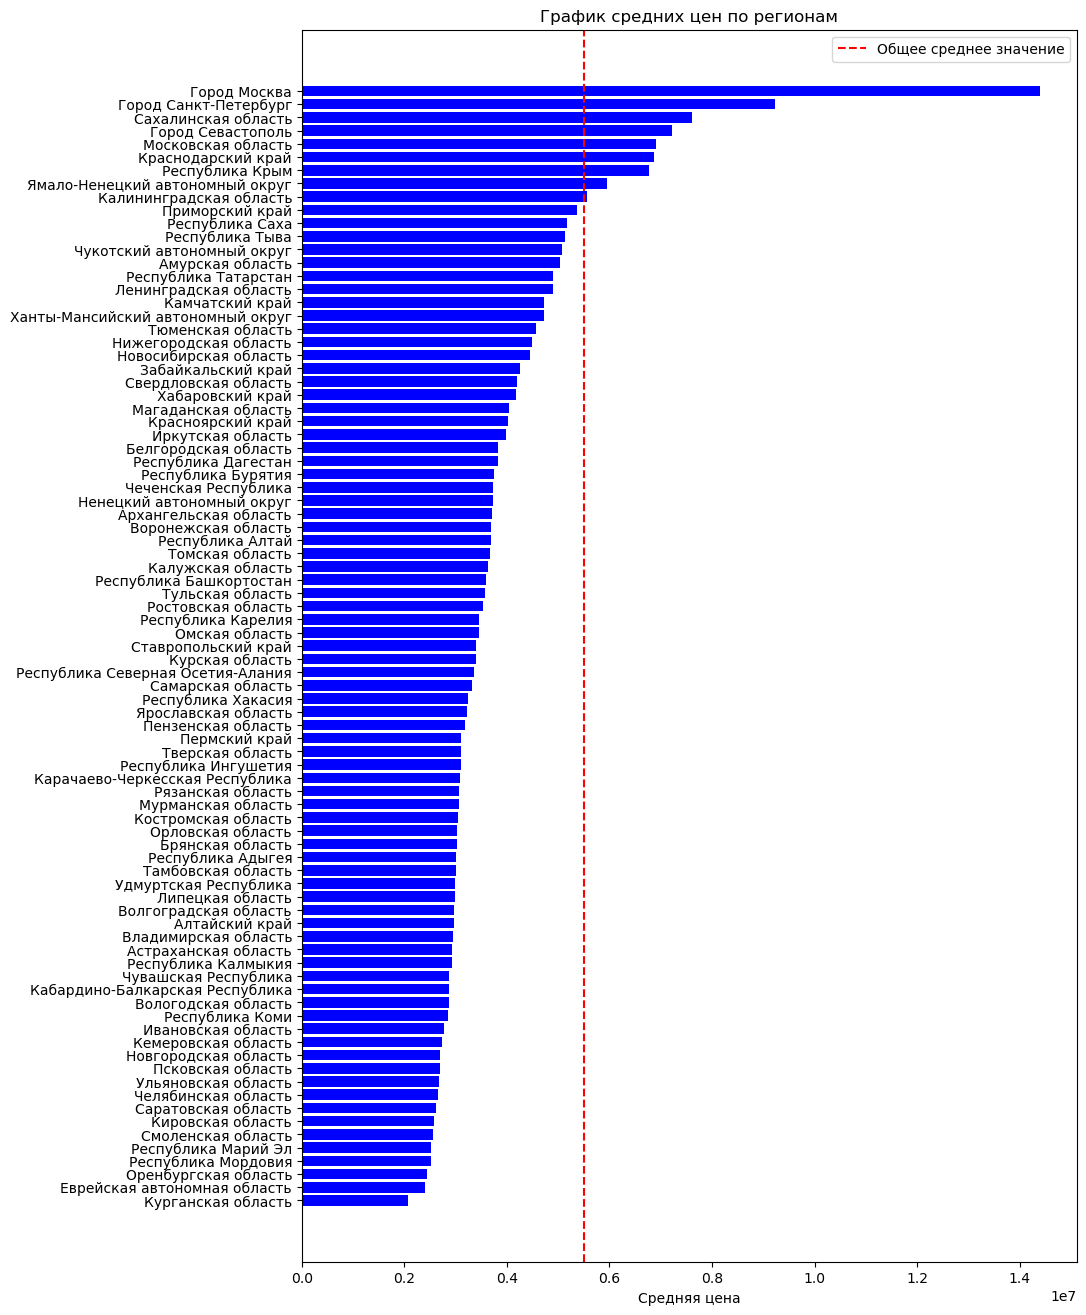

In [396]:
# Группировка и подсчет средней цены по регионам
average_price_by_region = final_df.groupby(['region_name'])['price'].mean().reset_index()

# Рассчет общей средней цены
overall_mean_price = final_df['price'].mean()

# Деление данных на две части: ниже средней и выше средней
below_mean = average_price_by_region[average_price_by_region['price'] < overall_mean_price]
above_mean = average_price_by_region[average_price_by_region['price'] >= overall_mean_price]

# Сортировка регионов от большего к меньшему по средней цене
sorted_regions = average_price_by_region.sort_values(by='price', ascending=True)

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(10, 16))

# Построение графика для регионов от большего к меньшему
ax.barh(sorted_regions['region_name'], sorted_regions['price'], color='blue')

# Добавление линии с общей средней ценой
ax.axvline(x=overall_mean_price, color='red', linestyle='--', label='Общее среднее значение')

# Настройка внешнего вида графика
ax.set_xlabel('Средняя цена')
ax.set_title('График средних цен по регионам')
ax.legend()

# Отображение графика
plt.show()

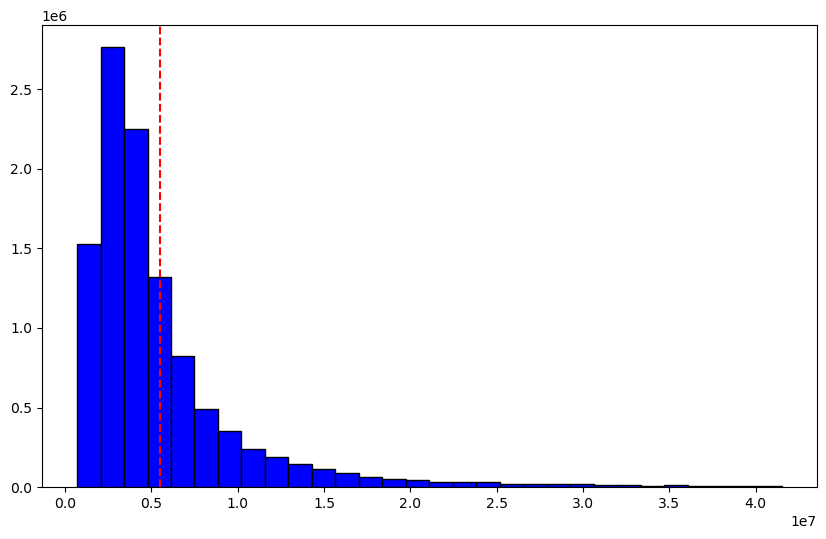

In [397]:
# Далее строим график по всемм регионам по стоимости квартир
# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(10, 6))

# Построение гистограммы
ax.hist(final_df['price'], bins=30, color='blue', edgecolor='black')

# Добавление линии средней цены
mean_price = final_df['price'].mean()
ax.axvline(x=mean_price, color='red', linestyle='--', label='Mean Price')

In [398]:
# График подчиняется закону нормального распределения. Заметна асимметрия.

In [399]:
# Гипотеза: чем больше людей живут в регионах - тем выше стоимость квартиры. 
# Для начала добавим данные по каждому региону (воспользуемся статьёй из википедии https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D1%83%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B9_%D0%A4%D0%B5%D0%B4%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D0%B8)
Pop = {
    1: 497985,
    2: 4077600, 
    3: 974628,
    4: 210769,
    5: 3209781,
    6: 519078,
    7: 903266,
    8: 264483,
    9: 468444,
    10: 527880,
    11: 726434,
    12: 672321, 
    13: 771373, 
    14: 997565, 
    15: 680748, 
    16: 4001625, 
    17: 337271,
    18: 1442251,
    19: 530233,
    20: 1533209,
    21: 1173177,
    22: 2130950,
    23: 5819345,
    24: 2845545,
    25: 1820076,
    26: 2891204,
    27: 1284090,
    28: 756198,
    29: 1005687,
    30: 1005687,
    31: 1514527,
    32: 1152505,
    33: 1325510,
    34: 2470057,
    35: 1128782,
    36: 2285282,
    37: 914725,
    38: 2344360,
    39: 1032343,
    40: 1070853,
    41: 288730,
    42: 2568238,
    43: 1138112,
    44: 571900,
    45: 761586,
    46: 1067034,
    47: 2023767,
    48: 1126263,
    49: 134315,
    50: 8591736,
    51: 658698,
    52: 3081817,
    53: 575926,
    54: 2794266,
    55: 1832064,
    56: 1841377,
    57: 700276,
    58: 1246609,
    59: 2508352,
    60: 587786,
    61: 4164547,
    62: 1088918,
    63: 3142683,
    64: 2404944,
    65: 460535,
    66: 4239161,
    67: 873041,
    68: 966250,
    69: 1211183,
    70: 1052106,
    71: 1481471,
    72: 3851234,
    73: 1181006,
    74: 3407145,
    75: 992429,
    76: 1194605,
    77: 13104177,
    78: 5600044,
    79: 147458,
    83: 41383,
    86: 1730353,
    87: 47840,
    89: 512387,
    91: 1916805,
    92: 558273
}

In [400]:
final_df_h = final_data.copy()

In [401]:
final_df_h['Population'] = final_df['id_region'].map(Pop)

In [402]:
final_df_h.head(10)

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region,Population
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66,4239161
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1,497985
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50,8591736
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1,497985
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23,5819345
5,2021-01-01,1450000.00,5,5,2,47.00,6.00,48.51,44.57,2,0,34,2470057
6,2021-01-01,9000000.00,2,4,3,107.40,21.30,55.01,82.93,4,0,54,2794266
7,2021-01-01,2990000.00,1,2,3,54.00,7.00,51.83,107.60,0,0,3,974628
8,2021-01-01,2300000.00,16,18,1,39.70,11.50,45.00,39.09,4,0,23,5819345
9,2021-01-01,2290000.00,2,2,2,53.20,16.00,53.16,45.03,5,0,58,1246609


In [403]:
# Формулировка гипотезы
# 0 гипотеза:

# H0: наблюдаемая разница в стоимости квартир в регионах РФ обусловлена любыми иными факторами, кроме как количество человек проживающих в регионе

# альтернативная гипотеза:

# H1: наблюдаемая разница в стоимости квартир в регионах объясняется количеством человек живущих в регионе

# Мы также выберем уровень значимости 0,05. Используем t-тест для проверки статистической значимости
from scipy.stats import linregress

price = final_df_h['price']
population = final_df_h['Population']

# Проведение линейной регрессии и t-теста
slope, intercept, r_value, p_value, std_err = linregress(population, price)

# Вывод результатов
print(f"Slope (коэффициент наклона): {slope}")
print(f"P-value (значение p): {p_value}")

# Проверка гипотезы о влиянии Population на Price
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая связь между Population и Price.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой связи между Population и Price.")


Slope (коэффициент наклона): 0.8698214772085826
P-value (значение p): 0.0
Отвергаем нулевую гипотезу. Существует статистически значимая связь между Population и Price.


In [ ]:
# # коэффициент наклона равен 0.8698, что означает, что при увеличении значения 'Population' на одну единицу, 
# 'Price' увеличится в среднем на 0.8698 единицы (в предположении линейной зависимости).

# # Значение p-value равно 0.0, что меньше уровня значимости 0.05 (если вы использовали этот уровень). 
# Маленькое значение p-value говорит о том, что у вас есть статистически значимые доказательства в пользу того, 
# что коэффициент наклона не равен нулю (то есть есть зависимость между 'Population' и 'Price').

# # Таким образом, на основе этого анализа можно сделать вывод, что существует статистически значимая 
# положительная зависимость между населением ('Population') и ценой ('Price').